In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv("diabetes.csv")

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.dropna

<bound method DataFrame.dropna of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [10]:
correlation_matrix = df.corr()

In [11]:
print(correlation_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

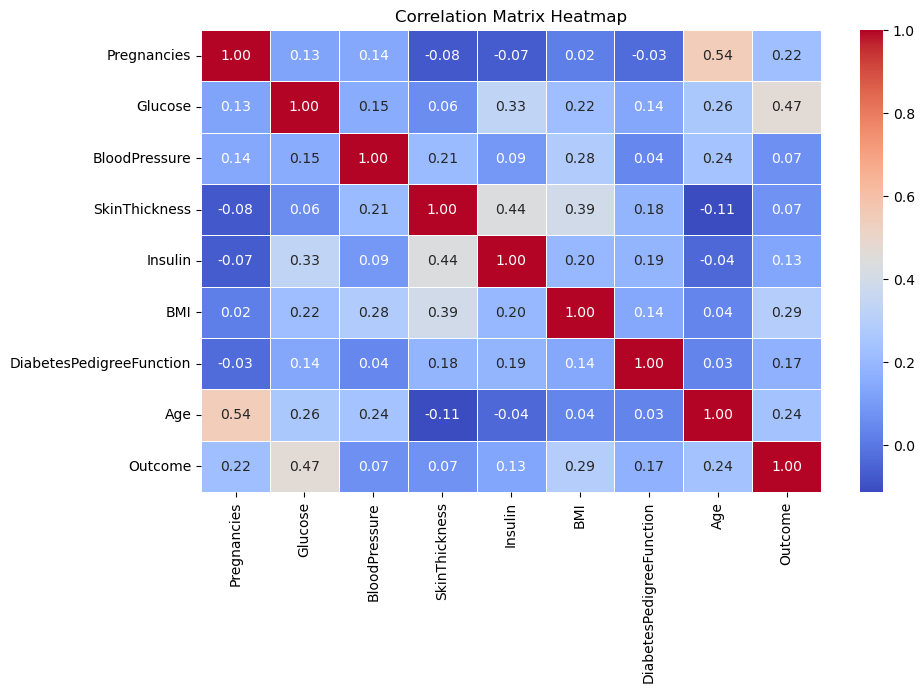

In [12]:
plt.figure(figsize=(10,6))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [14]:
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [15]:
print("Original DataFrame:\n", df)
print("\nDataFrame after removing outliers:\n", df_no_outliers)

Original DataFrame:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1 

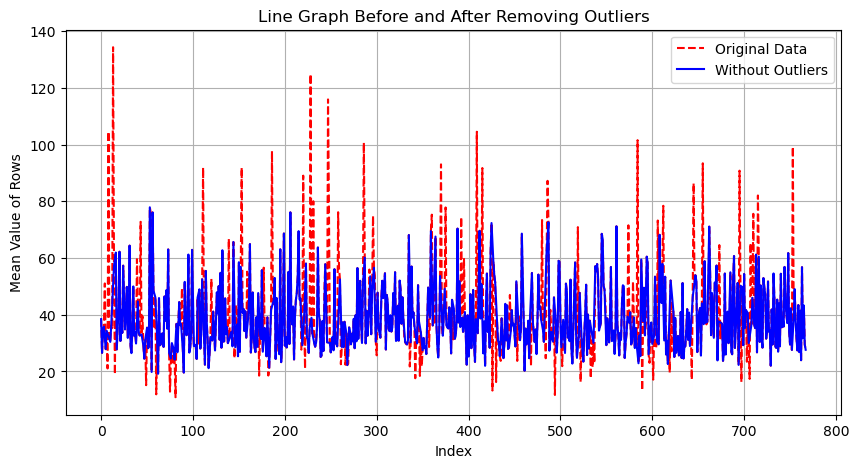

In [16]:
import matplotlib.pyplot as plt

# Plot the original data
plt.figure(figsize=(10, 5))
plt.plot(df.index, df.mean(axis=1), label="Original Data", linestyle='dashed', color='red')

# Plot the cleaned data (without outliers)
plt.plot(df_no_outliers.index, df_no_outliers.mean(axis=1), label="Without Outliers", color='blue')

# Labels and title
plt.xlabel("Index")
plt.ylabel("Mean Value of Rows")
plt.title("Line Graph Before and After Removing Outliers")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [21]:
# Calculate Mean, Median, and Mode
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]  # Take the first row since mode() returns multiple modes if they exist

# Display the results
print("Mean Values:\n", mean_values, "\n")
print("Median Values:\n", median_values, "\n")
print("Mode Values:\n", mode_values, "\n")

Mean Values:
 Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64 

Median Values:
 Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64 

Mode Values:
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               70.000
SkinThickness                0.000
Insulin                      0.000
BMI                         32.000
DiabetesPedigreeFunction    

In [24]:
from sklearn.model_selection import train_test_split

In [31]:
x=df.drop(columns=['Outcome'])

In [32]:
y=df['Outcome']

In [37]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [39]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=20,random_state=40)

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [48]:
model=DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

In [49]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [50]:
y_pred=model.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix

In [59]:
accuracy=accuracy_score(y_pred, y_test)
print(accuracy)

0.7


In [60]:
classification=classification_report(y_pred, y_test)
print(classification)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.67      0.67      0.67         9

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20



In [58]:
precision=precision_score(y_pred, y_test)
print(precision)

0.6666666666666666


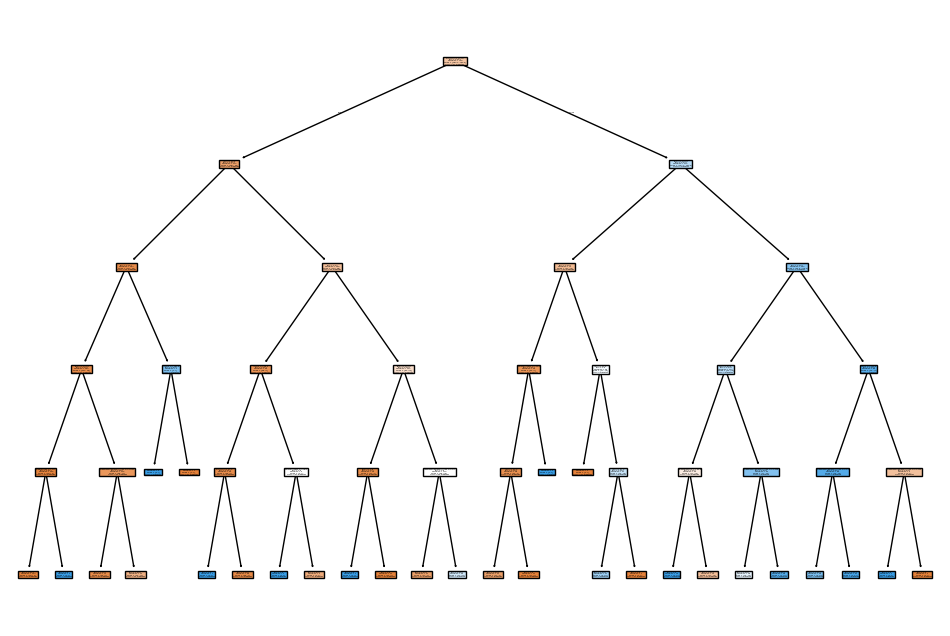

In [61]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=df.columns[:-1], class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()

In [62]:
model= DecisionTreeClassifier(criterion='gini',max_depth=25,random_state=42)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

0.7


In [68]:
model= DecisionTreeClassifier(criterion='gini',max_depth=56,random_state=42)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

0.7


In [69]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=56,random_state=42)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

0.7


In [70]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

0.7


In [74]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[8 3]
 [3 6]]


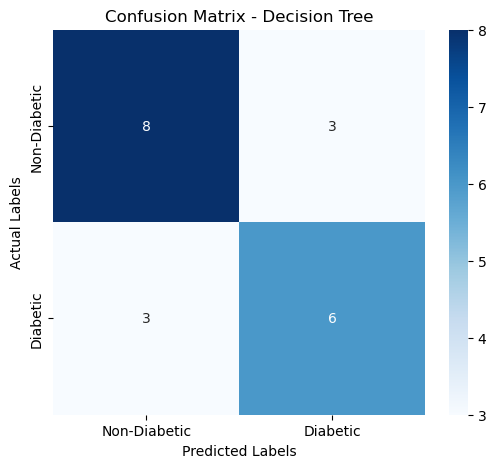

In [76]:
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d", 
            xticklabels=["Non-Diabetic", "Diabetic"], 
            yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix - Decision Tree")
plt.show()